# MOwNiT 
## Laboratorium
## Wybrane zagadnienia algebry liniowej, faktoryzacja
### Algebra liniowa w Julii
https://docs.julialang.org/en/v1.7/stdlib/LinearAlgebra/index.html


In [22]:
using(LinearAlgebra)
using DataFrames
using Statistics
using Plots
using CSV
using DataFrames
using Statistics
using LinearAlgebra
using Polynomials
ENV["COLUMNS"] = 1000;

In [2]:
methods(factorize)

# 11 methods for generic function "factorize":
[1] factorize(A::StridedMatrix{T}) where T in LinearAlgebra at C:\Users\kzaja\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\dense.jl:1302
[2] factorize(A::Adjoint) in LinearAlgebra at C:\Users\kzaja\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\dense.jl:1376
[3] factorize(A::Transpose) in LinearAlgebra at C:\Users\kzaja\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\dense.jl:1377
[4] factorize(A::LinearAlgebra.AbstractTriangular) in LinearAlgebra at C:\Users\kzaja\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\triangular.jl:2569
[5] factorize(A::Tridiagonal) in LinearAlgebra at C:\Users\kzaja\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\lu.jl:567
[6] factorize(D::Diagonal) in LinearAlgebra at C:\Users\kzaja\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\diagonal.jl:137
[7] factorize(A::Bidiagonal) in LinearAlgebra at C:\Users\kzaja\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\bidiag.jl:845
[8] factorize(S::SymTridiagonal) in LinearAlgebra at C:\Users\kzaja\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\ldlt.jl:170
[9] factorize(A::SparseArrays.AbstractSparseMatrixCSC) in SparseArrays at C:\Users\kzaja\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\SparseArrays\src\linalg.jl:1586
[10] factorize(A::Union{Hermitian{ComplexF64, var"#s859"}, Hermitian{Float64, var"#s859"}, Symmetric{Float64, var"#s859"}} where var"#s859"<:SparseArrays.AbstractSparseMatrixCSC) in SparseArrays at C:\Users\kzaja\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\SparseArrays\src\linalg.jl:1616
[11] factorize(A::Union{Hermitian{T, S}, Symmetric{T, S}} where {T, S}) in LinearAlgebra at C:\Users\kzaja\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\symmetric.jl:641

In [3]:
#wiersze vs kolumny
x1=[1 2 2]

1×3 Matrix{Int64}:
 1  2  2

In [4]:
y1=[1 ;2 ;3]

3-element Vector{Int64}:
 1
 2
 3

In [5]:
transpose(x1)

3×1 transpose(::Matrix{Int64}) with eltype Int64:
 1
 2
 2

In [6]:
#iloczyn skalarny
dot(x1,y1)

11

 Długość wektora liczymy jako pierwiastek z jego iloczynu skalarnego 
$$ \lVert\mathbf{v}\rVert = \sqrt{\mathbf{v}\cdot \mathbf{v}}=\sqrt{\sum_{i=1}^nv_i^2}$$



#### Przykładowe dane

In [7]:
#losujemy macierz 3x3
A=rand(3,3)

3×3 Matrix{Float64}:
 0.201333  0.730256   0.874181
 0.962293  0.61645    0.253017
 0.591243  0.0279556  0.208219

In [8]:
#losujemy wektor x
x=rand(3)

3-element Vector{Float64}:
 0.6494978713049762
 0.46570721507453183
 0.48760751497651733

In [9]:
# wyliczamy b
b=A*x

3-element Vector{Float64}:
 0.897107931693224
 1.03546539325556
 0.49855914678814334

### Sposoby rozwiązania Ax=b

In [10]:
#mozemy policzyc odwrotność macierzy i wymnożyć
# uwaga: nieefektywne!
inv(A) * b

3-element Vector{Float64}:
 0.6494978713049763
 0.4657072150745318
 0.4876075149765174

In [11]:
#najlepiej używać zoptymalizowanego operatora "\""
x=A\b

3-element Vector{Float64}:
 0.6494978713049762
 0.4657072150745318
 0.48760751497651744

 operator "\\" wybiera odpowiednią faktoryzację:
- https://docs.julialang.org/en/v1.2/stdlib/LinearAlgebra/#LinearAlgebra.factorize
- https://docs.julialang.org/en/v1.2/stdlib/LinearAlgebra/#man-linalg-factorizations-1
 


### Faktoryzacja LU

In [12]:
# W przypadku ogólnej macierzy kwadratowej jest to faktoryzacja LU z pivotem
Af=factorize(A)

LU{Float64, Matrix{Float64}}
L factor:
3×3 Matrix{Float64}:
 1.0        0.0       0.0
 0.209222   1.0       0.0
 0.61441   -0.583416  1.0
U factor:
3×3 Matrix{Float64}:
 0.962293  0.61645   0.253017
 0.0       0.601281  0.821245
 0.0       0.0       0.531891

In [13]:
# Macierz L
Af.L

3×3 Matrix{Float64}:
 1.0        0.0       0.0
 0.209222   1.0       0.0
 0.61441   -0.583416  1.0

In [14]:
#Macierz U
Af.U

3×3 Matrix{Float64}:
 0.962293  0.61645   0.253017
 0.0       0.601281  0.821245
 0.0       0.0       0.531891

In [15]:
# wektor permulatacji wierszy 
Af.p

3-element Vector{Int64}:
 2
 1
 3

In [16]:
# mozemy zamienic macierz A na postać zfaktoryzowaną
A=factorize(A)

LU{Float64, Matrix{Float64}}
L factor:
3×3 Matrix{Float64}:
 1.0        0.0       0.0
 0.209222   1.0       0.0
 0.61441   -0.583416  1.0
U factor:
3×3 Matrix{Float64}:
 0.962293  0.61645   0.253017
 0.0       0.601281  0.821245
 0.0       0.0       0.531891

In [17]:
# i działać na niej operatorem \
# operator ten będzie wykorzytywał raz utworzony wynik faktoryzacji
A\b

3-element Vector{Float64}:
 0.6494978713049762
 0.4657072150745318
 0.48760751497651744

In [18]:
# dla różnych prawych stron równania z tą samą macierzą
c=rand(3);
A\c

3-element Vector{Float64}:
 0.46028506974417727
 0.8374221118633624
 0.020357928999785613

### Faktoryzacja QR


In [19]:
B=rand(10,5)

10×5 Matrix{Float64}:
 0.413965   0.00524901  0.963826   0.632963  0.329576
 0.455467   0.410653    0.138445   0.867344  0.391937
 0.0478521  0.342658    0.592005   0.166132  0.729935
 0.595275   0.568469    0.959588   0.846336  0.28413
 0.254104   0.322546    0.632214   0.60233   0.340109
 0.661588   0.314318    0.0998852  0.288977  0.85628
 0.0989537  0.882192    0.644475   0.905718  0.894542
 0.469139   0.264447    0.952984   0.67456   0.413944
 0.399162   0.942584    0.103219   0.294836  0.266671
 0.770202   0.662923    0.24402    0.311711  0.877025

In [20]:
# W przypadku ogólnej macierzy prostokątnej wybierana jest faktoryzacja QR z pivotem
factorize(B)

QRPivoted{Float64, Matrix{Float64}}
Q factor:
10×10 LinearAlgebra.QRPackedQ{Float64, Matrix{Float64}}:
 -0.480545    0.212773   -0.308719   …  -0.467789    -0.290149   -0.111893
 -0.069026   -0.221479    0.128279       0.0388043    0.174901   -0.175904
 -0.295162   -0.255131   -0.222705      -0.0666513    0.380218   -0.308677
 -0.478432    0.244019    0.306051      -0.255056     0.0138046  -0.15605
 -0.31521     0.0489261   0.0368137     -0.0782618    0.645647    0.624244
 -0.0498008  -0.579262   -0.305746   …  -0.0182322    0.199475   -0.32256
 -0.321323   -0.35082     0.210526      -0.0130101   -0.400169    0.07429
 -0.47514     0.145961   -0.101646       0.837935    -0.0915234  -0.0504201
 -0.0514632  -0.146444    0.771172       0.00011523   0.11606    -0.246299
 -0.121663   -0.526568    0.0278857     -0.0375557   -0.319117    0.523885
R factor:
5×5 Matrix{Float64}:
 -2.00569  -1.29121  -1.05958   -1.01128   -1.68687
  0.0      -1.36722  -0.962833  -0.680804  -0.457807
  0.0       0

- $Q$ to macierz  ortogonalna mxm, co oznacza, że  $Q^T*Q=Q*Q^T=I$ czyli $Q^{-1}=Q^T$ (odwracanie takich macierzy jest szybkie i nie generuje dodatkowych błędów !)
- $R$ to macierz postaci $\begin{pmatrix} Rfactor \\ 0 \end{pmatrix} $ , gdzie $Rfactor$ jest macierzą trójkątną górną, a 0 to macierz zer o wymierze nx(m-n)

### Zastosowanie faktoryzacji do metody najmniejszych kwadratów

Jednym z zastosowań faktoryzacji QR jest użycie jej do metody najmniejszych kwadratów.

Przykład:

Obliczmy dopasowanie wielomianu $$f(x)=wsp_2*x^2+wsp_1*x+wsp_0$$ do punktów (1,1) (2,2) (3,4) (4, 4) (5,3) (6,0)

- Budujemy układ równań wg wzoru $$wsp_2x_i^2+wsp_1x_i+wsp_0=y_i$$:
$$wsp_2*1^2+wsp_1*1+wsp_0=1$$
$$wsp_2*2^2+wsp_1*2+wsp_0=2$$
$$wsp_2*3^2+wsp_1*3+wsp_0=4$$
$$wsp_2*4^2+wsp_1*4+wsp_0=4$$
$$wsp_2*5^2+wsp_1*5+wsp_0=3$$
$$wsp_2*6^2+wsp_1*6+wsp_0=0$$

- Układ ten  nie ma dokładnego rozwiązania. Możemy jednak znaleźć najlepsze przybliżenie, czyli takie $wsp_i$, które minimalizują odległość:

$$\sqrt{\sum_{i=1}^{6}{(y_i-f(x_i))^2}}=\lVert y-A*wsp\rVert$$





Jak użyć do tej mimalizacji faktoryzacji QR:

#### 1. Tworzymy macierz A na postawie $(x_i,y_i)$

In [21]:
A=zeros(6,3) 

6×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

 punkty $(x_i,y_i)$


In [22]:
x=[1; 2 ;3 ;4 ;5 ;6]
y=[1; 2; 4; 4; 3; 0]

6-element Vector{Int64}:
 1
 2
 4
 4
 3
 0

In [23]:
A[:,1]=x.^2

6-element Vector{Int64}:
  1
  4
  9
 16
 25
 36

In [24]:
A[:,2]=x

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6

In [25]:
A[:,3]=ones(6)

6-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [26]:
A

6×3 Matrix{Float64}:
  1.0  1.0  1.0
  4.0  2.0  1.0
  9.0  3.0  1.0
 16.0  4.0  1.0
 25.0  5.0  1.0
 36.0  6.0  1.0

#### 2. Dokonujemy faktoryzacji QR macierzy A 

In [27]:
 AF=factorize(A)

QRPivoted{Float64, Matrix{Float64}}
Q factor:
6×6 LinearAlgebra.QRPackedQ{Float64, Matrix{Float64}}:
 -0.0209657  -0.343313    0.838525   0.112335    -0.0400677  -0.405397
 -0.0838628  -0.521522    0.167705  -0.00636667   0.34634     0.756879
 -0.188691   -0.534625   -0.223607  -0.612934    -0.487947   -0.121617
 -0.335451   -0.382624   -0.33541    0.753648    -0.213523   -0.122449
 -0.524142   -0.0655178  -0.167705  -0.204705     0.705864   -0.390779
 -0.754765    0.416693    0.279508  -0.0419783   -0.310667    0.283364
R factor:
3×3 Matrix{Float64}:
 -47.697  -9.24587  -1.90788
   0.0    -2.34816  -1.43091
   0.0     0.0       0.559017
permutation:
3-element Vector{Int64}:
 1
 2
 3

In [28]:
# można przetestować ortogonalność:
Transpose(AF.Q)*AF.Q

6×6 Matrix{Float64}:
  1.0           0.0           1.66533e-16  …   2.77556e-17  -2.77556e-17
  0.0           1.0           5.55112e-17      8.32667e-17  -9.71445e-17
  1.66533e-16   5.55112e-17   1.0             -6.93889e-17  -2.77556e-17
 -2.08167e-17  -4.85723e-17  -7.97973e-17     -6.59195e-17  -3.1225e-17
  2.77556e-17   8.32667e-17  -6.93889e-17      1.0          -2.77556e-17
 -2.77556e-17  -9.71445e-17  -2.77556e-17  …  -2.77556e-17   1.0

Mamy równanie:
$$A*wsp=y$$
Dla $A=QR$:
$$QR*wsp =y$$
Możemy obydwie strony wymnożyć z lewej przez $Q^T$:
$$R*wsp =Q^T y$$
$$\begin{pmatrix} Rfactor \\ 0 \end{pmatrix} wsp= Q^T y$$

Poszukiwanym rozwiązaniem jest rozwiązanie równania będącego górną niezerową częścią:
$$Rfactor * wsp= Q^T y[1:n]$$
$$wsp=Rfactor \setminus Q^T y[1:n]$$

In [29]:
# implementacja powyższego (uwaga: w tym przykladzie nie jest potrzebna permutacja,
# bo wektor permutacji wynosi[1 2 3])
AF.R\((Transpose(AF.Q)*y)[1:3])

3-element Vector{Float64}:
 -0.5714285714285724
  3.94285714285715
 -2.8000000000000145

Więcej informacji:
- http://www.math.uconn.edu/~leykekhman/courses/MATH3795/Lectures/Lecture_8_Linear_least_squares_orthogonal_matrices.pdf
- http://www.seas.ucla.edu/~vandenbe/133A/lectures/qr.pdf

W praktyce używamy tego algorytmu poprzez operator "\\", za którym jest on "schowany".

In [30]:
A \ y

3-element Vector{Float64}:
 -0.5714285714285723
  3.9428571428571493
 -2.8000000000000136

In [31]:
#sprawdzamy czy dostaliśmy dobre wspólczynniki
using Polynomials
fit(x,y, 2)

Polynomial(-2.8000000000000136 + 3.9428571428571493*x - 0.5714285714285723*x^2)

In [32]:
@which fit

Polynomials

### Zadania

#### Zadanie 1 (1pkt)
Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x.
Nastepnie rozwiąż równanie Ax=b trzema metodami:
- inv()
- \
- factorize()

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy  od drugiego wywołania !

In [10]:
# losujemy macierz 1000x1000
A = rand(1000,1000)
# Pionowy wektor
x = rand(1000)

b = A * x

quality(y) = reduce((s, t) -> s + abs(t), y - x);

quality_inv, quality_div, quality_factorize = [], [], []
time_inv, time_div, time_factorize = [], [], []
for i in 1:10
    append!(quality_inv, quality(inv(A) * b))         
    append!(time_inv, @elapsed (inv(A) * b))
    append!(quality_div, quality(A \ b))             
    append!(time_div, @elapsed (A \ b))
    append!(quality_factorize, quality(factorize(A) \ b))   
    append!(time_factorize, @elapsed (factorize(A) \ b))
end

data_frame = DataFrame(
    inv_quality = Float64[],
    inv_time = Float64[],
    div_quality = Float64[],
    div_time = Float64[],
    factorize_quality = Float64[],
    factorize_time = Float64[]
)

for i in 1:10 
    append!(data_frame.inv_quality, quality_inv[i])
    append!(data_frame.inv_time, time_inv[i])
    append!(data_frame.div_quality, quality_div[i])
    append!(data_frame.div_time, time_div[i])
    append!(data_frame.factorize_quality, quality_factorize[i])
    append!(data_frame.factorize_time, time_factorize[i])
end    

data_frame

,inv_quality,inv_time,div_quality,div_time,factorize_quality,factorize_time
,Float64,Float64,Float64,Float64,Float64,Float64
1,9.6196e-9,0.103064,5.9419e-9,0.0875061,5.9419e-9,0.0693548
2,9.6196e-9,0.110896,5.9419e-9,0.0473172,5.9419e-9,0.0692548
3,9.6196e-9,0.113589,5.9419e-9,0.0551566,5.9419e-9,0.0861406
4,9.6196e-9,0.0850202,5.9419e-9,0.0559311,5.9419e-9,0.0848878
5,9.6196e-9,0.0986615,5.9419e-9,0.0490602,5.9419e-9,0.0662063
6,9.6196e-9,0.0987596,5.9419e-9,0.179347,5.9419e-9,0.347028
7,9.6196e-9,0.277278,5.9419e-9,0.159532,5.9419e-9,0.18069
8,9.6196e-9,0.232619,5.9419e-9,0.0658171,5.9419e-9,0.0626112
9,9.6196e-9,0.200877,5.9419e-9,0.103874,5.9419e-9,0.0669947


In [40]:
data_frame_result = combine(
    data_frame,
    :inv_quality => mean => :inv_quality,
    :inv_time => mean,
    :inv_time => std,
    :div_quality => mean => :div_quality,
    :div_time => mean,
    :div_time => std,
    :factorize_quality => mean => :factorize_quality,
    :factorize_time => mean,
    :factorize_time => std,
)

data_frame_result

,inv_quality,inv_time_mean,inv_time_std,div_quality,div_time_mean,div_time_std,factorize_quality,factorize_time_mean,factorize_time_std
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,9.6196e-9,0.141527,0.0687323,5.9419e-9,0.0868282,0.0471537,5.9419e-9,0.109504,0.0906878


#### Zadanie 2 (1pkt)
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

In [43]:
file = "datalab5.csv"
df = CSV.read(file, delim=",",DataFrame);
df

,length,t,time_mean,time_std
,Int64,String1,Float64,Float64
1,100,n,0.005,0.00527046
2,100,i,0.006,0.00516398
3,100,b,0.0,0.0
4,200,n,0.044,0.00516398
5,200,i,0.038,0.00632456
6,200,b,0.0,0.0
7,300,n,0.131,0.00737865
8,300,i,0.107,0.00948683
9,300,b,0.0,0.0


In [44]:
x_julia = df[df[:,2] .== "n", 1]
y_julia_i = df[df[:,2] .== "i", 3]

10-element Vector{Float64}:
 0.006
 0.038
 0.10700000000000001
 0.251
 0.489
 0.841
 1.3419999999999999
 2.0519999999999996
 3.021
 4.058

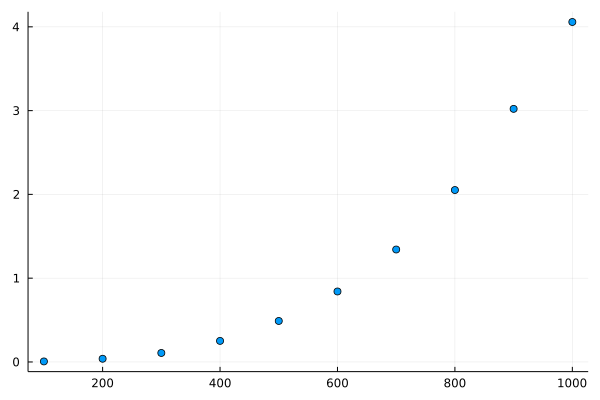

In [45]:
fit_poly_julia_i = fit(x_julia, y_julia_i, 3)
scatter(x_julia,y_julia_i, label ="")

In [46]:
A_aprox = zeros(10, 4)

10×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [49]:
A_aprox[:,1]=x_julia.^3;
A_aprox[:,2]=x_julia.^2;
A_aprox[:,3]=x_julia.^1;
A_aprox[:,4]=ones(10);
A_aprox

10×4 Matrix{Float64}:
 1.0e6    10000.0     100.0  1.0
 8.0e6    40000.0     200.0  1.0
 2.7e7    90000.0     300.0  1.0
 6.4e7   160000.0     400.0  1.0
 1.25e8  250000.0     500.0  1.0
 2.16e8  360000.0     600.0  1.0
 3.43e8  490000.0     700.0  1.0
 5.12e8  640000.0     800.0  1.0
 7.29e8  810000.0     900.0  1.0
 1.0e9        1.0e6  1000.0  1.0

In [52]:
A_aprox_F = factorize(A_aprox)

aprox_res_QR = A_aprox_F \ y_julia_i

poly_aprox = Polynomial( reverse(aprox_res_QR))
fit_aprox = fit(x_julia, y_julia_i, 3)

Polynomial(0.012499999999998014 - 2.0099067599056556e-5*x - 2.3747086247088054e-7*x^2 + 4.33216783216784e-9*x^3)

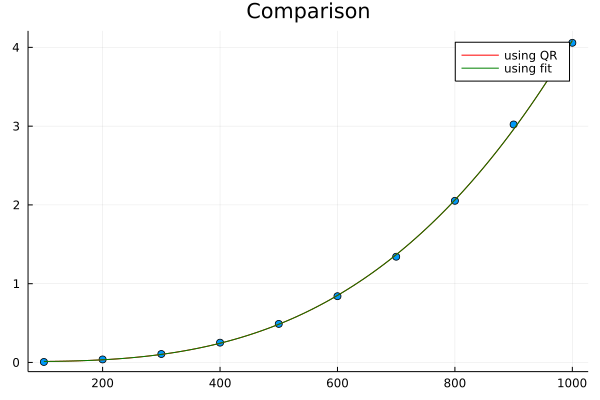

In [57]:
scatter(x_julia, y_julia_i, label ="")
plot!(poly_aprox,  
    extrema(x_julia)..., 
    label = "using QR",
    color = :red,
    title = "Comparison"
)
plot!(fit_aprox,  
    extrema(x_julia)..., 
    label = "using fit",
    color = :green
)

#### Zadanie 3 (2 pkt)

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

-    tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

-   uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

-  zastosowanie faktoryzacji SVD - np. zastosowania w uczeniu maszynowym 

#### Użycie faktoryzacji QR do znajdowania wartości własnych
Wyznaczanie wartości własnych macierzy za pomocą faktoryzacji $QR$ polega na wykonywaniu następujących kroków:
- Wyznaczamy faktoryzację $QR$ macierzy $A$ jako $A = QR$
- Podstawiamy $A = RQ$

Powyższe kroki wykonujemy do momentu otrzymania macierzy trójkątnej górnej.\
Wartościami własnymi będą wartości na przekątnej głównej macierzy $A$.

In [58]:
B = [1 2 3; 6 5 1; 3 2 1]

BF = qr(B)

function isuptriangular(A)
    sz = size(A)[1]
    for i in 2:sz
        for j in 1:(i-1)
            if A[i, j] != 0
                return false
            end
        end
    end
    return true
end

function eigen(B)
    while !isuptriangular(B)
        BF = qr(B)
        B = BF.R * BF.Q
    end
    diag(B)
end

eigen(B)

eigvals(B)

3-element Vector{Float64}:
 -2.0000000000000027
  0.725082782364625
  8.274917217635384